# PHYS 434 Lab 3 #

Tianhao Jiang

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import math
from scipy import stats
from scipy import signal
from math import floor

## Problem 1 ##
In our first example we are looking at the temperature reading (meta-data) associated with an experiment. For the experiment to work reliably, the temperature should be at around 12 Kelvin, and if we look at the data it is mostly consistent with 12 Kelvin to within the 0.4 degree precision of the thermometry and the thermal control system (standard deviation). However, there are times when the thermal control system misbehaved and the temperature was not near 12 K, and in addition there are various glitches in the thermometry that give anomalously high and low readings (the reading does not match the real temperature). We definitely want to identify and throw out all the data when the thermal control system was not working (and the temperature was truly off from nominal). While it is possible to have an error in the thermometry such that the true temperature was fine, and we just had a wonky reading, in an abundance of caution we want to throw those values out too.

To make this a bit concrete, we will simulate a little data. Start by simulating 100k 'good' data points assuming Gaussian fluctations, and because we are playing god adding the following 'bad' datapoints: {10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7}

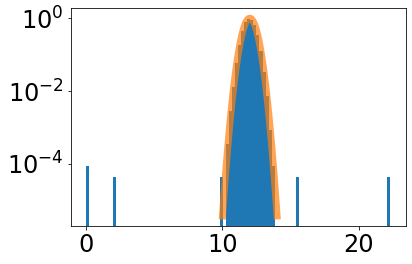

In [2]:
sd = 0.4
mean = 12.
numdata = 100000
data = stats.norm.rvs(loc = mean, scale = sd, size = numdata, random_state=1234)
baddata = np.array([10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
d = np.append(data, baddata)
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
#plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams["figure.figsize"] = (6,4)
x = np.linspace(10,14,1000)
ax.plot(x,stats.norm.pdf(x,loc = 12., scale = sd),linewidth = 7,alpha = 0.7)
plt.show()

**A) So our goal is to identify bad data and throw it out.**

We know the good temperatures are drawn from a Gaussian distribution with its mean = 12 and standard deviation = 0.4. 

My statistical question is, if I consider all the data that is more than 3 standard deviations from the mean of the distribution as bad data, which data will I keep and which will I discard? 

I can also ask what percentage of good data I can expect to keep if I choose the (mean +/-3sd) range. 

The purpose of this question is to keep as much good data as possible and discard as much bad data as possible. By choosing a range of +/-3 sd from the mean and knowing that the distribution is Gaussian, I can expect to keep 99.73% of the good data. Also, the width of the range 0.4*3*2 = 2.4 is not too big, so I could probably be confident that most of the bad data are outside of this range.

Converting the qeustions to math:

For my first question, I would keep all the data within the range of 12 +/-3*0.4 = (10.8, 13.2) and discard all the data outside of the range.

For my second question, the percentage equals the integral from 10.8 to 13.2 on the good data's population distribution, which equals the integral from -3 to 3 on a standard normal distribution = 2 * (norm.cdf(3,0,1) - 0.5) * 100% = 99.73%





In [3]:
k = 3
result = (d < mean - sd * k) | (d > mean + sd * k)
goodremoved = data[result[0:numdata]]
badremoved = baddata[result[numdata:len(result)]]

#print("k = %.2f" % k)
print("Range of temperature considered to be good data: mean +/-%.2f * sd = (%.2f, %.2f)" % (k, mean - sd * k, mean + sd * k))
print("My truth table:")
print("I test good, true T: %i; I test good, bad T: %i;" % (len(data)-len(goodremoved), len(baddata)-len(badremoved)))
print("I test bad, true T: %i; I test bad, bad T: %i." % (len(goodremoved), len(badremoved)))
print("%s of good data omitted, %s expected." % ("{0:.4%}".format(len(goodremoved)/len(data)), "{0:.4%}".format(2-2*stats.norm.cdf(k,0,1))))
print("Bad data removed: %s" % str(badremoved))
print("Bad data kept: %s" % str(baddata[~result[numdata:len(result)]]))

Range of temperature considered to be good data: mean +/-3.00 * sd = (10.80, 13.20)
My truth table:
I test good, true T: 99741; I test good, bad T: 1;
I test bad, true T: 259; I test bad, bad T: 7.
0.2590% of good data omitted, 0.2700% expected.
Bad data removed: [10.  10.3  2.1  0.   0.  15.6 22.3]
Bad data kept: [12.7]


**B) How does the number of omissions, where you threw out good data, depend on the statistical threshold you chose and is it a predictable quantity?**

**C) Are there mistakes of commission (bad data getting in)? If yes, are they avoidable and how do they depend on your statistical threshold?**

Below I also calculated the test results when I choose the range to be (mean +/- k*sd) with k set to different values.

In [4]:
ks = [1, 2, 4, 8]
for k in ks:
    result = (d < mean - sd * k) | (d > mean + sd * k)
    goodremoved = data[result[0:numdata]]
    badremoved = baddata[result[numdata:len(result)]]
    print("k = %.2f" % k)
    print("Range of temperature considered to be good data: mean +/-%.2f * sd = (%.2f, %.2f)" % (k, mean - sd * k, mean + sd * k))
    print("My truth table:")
    print("I test good, true T: %i; I test good, bad T: %i;" % (len(data)-len(goodremoved), len(baddata)-len(badremoved)))
    print("I test bad, true T: %i; I test bad, bad T: %i." % (len(goodremoved), len(badremoved)))
    print("%s of good data omitted, %s expected." % ("{0:.4%}".format(len(goodremoved)/len(data)), "{0:.4%}".format(2-2*stats.norm.cdf(k))))
    print("Bad data removed: %s" % str(badremoved))
    print("Bad data kept: %s\n" % str(baddata[~result[numdata:len(result)]]))

k = 1.00
Range of temperature considered to be good data: mean +/-1.00 * sd = (11.60, 12.40)
My truth table:
I test good, true T: 68120; I test good, bad T: 0;
I test bad, true T: 31880; I test bad, bad T: 8.
31.8800% of good data omitted, 31.7311% expected.
Bad data removed: [10.  10.3  2.1  0.   0.  15.6 22.3 12.7]
Bad data kept: []

k = 2.00
Range of temperature considered to be good data: mean +/-2.00 * sd = (11.20, 12.80)
My truth table:
I test good, true T: 95491; I test good, bad T: 1;
I test bad, true T: 4509; I test bad, bad T: 7.
4.5090% of good data omitted, 4.5500% expected.
Bad data removed: [10.  10.3  2.1  0.   0.  15.6 22.3]
Bad data kept: [12.7]

k = 4.00
Range of temperature considered to be good data: mean +/-4.00 * sd = (10.40, 13.60)
My truth table:
I test good, true T: 99998; I test good, bad T: 1;
I test bad, true T: 2; I test bad, bad T: 7.
0.0020% of good data omitted, 0.0063% expected.
Bad data removed: [10.  10.3  2.1  0.   0.  15.6 22.3]
Bad data kept: [12.7

As shown, as k increases, less good data will be omitted, but more bad data will be included.

The percentage of good data omitted when the range is (mean +/- k \* sd) can be predicted by calculating    (2-2*stats.norm.cdf(k)).

No bad data is included when k=1. However, we cannot calculate how many bad data we will expect to include without knowing the bad data's population distribution.

## Problem 2 ##
In this example we will be looking for asteroids. If we look at the alignment of stars on subsequent images, they don't perfectly align due to atmospheric and instrumental effects (even ignoring proper motion). The resulting distribution is two dimensional, and for this lab let's assume it is a 2D Gaussian with 1 arcsecond RMS. Or said another way, if I histogram how far all the (stationary) stars appear to have moved I get something like:

**If I have a potential asteroid, it will have some true movement between the images. We would like a '5 sigma' detection of movement. What is that distance in arcseconds?**

My question: 

Knowing that the background is a 2D Gaussian distribution with an RMS of 1 arcsecond, and suppose I make an observation, what is the smallest distance of my observation from the center of my background distribution needed for my observation to be 5-sigma?

A 2D Gaussian with a 1 arcsecond RMS is equivalent to the joint distribution of two Gaussian both with a 1 arcsecond standard deviation. As proved in HW3, the distribution of the distance from origin on this distribution is a Rayleigh distribution with a parameter of 1 arcsecond.

Thus we first need to integrate a standard normal distribution from -infinity to 5 to find the probability, and then insert this probability into the PPF of the Rayleigh distribution to find the distiance.

In [5]:
prob = stats.norm.cdf(5)
distance = stats.rayleigh.ppf(prob)
print("The minimum distance needed for a 5-sigma detection is %f arcseconds." % distance)

The minimum distance needed for a 5-sigma detection is 5.489080 arcseconds.


## Problem 3 ##
As we discussed in class, one of the key backgrounds for gamma-ray telescopes are cosmic rays. Cosmic rays are charged particles—usually protons or electrons but can include atomic nuclei such a alpha particles (helium) or iron. Because of their charge cosmic rays spiral in the magnetic field of the galaxy. From the perspective of the Earth they appear to be coming uniformly from all directions like a high energy gas, and the direction the cosmic ray is travelling when it reaches the Earth tells us nothing about where it came from because we don't know what tortured path it has taken through the galaxy to reach us. However, at trillion electron volt energies and above, the spiral loops are fairly big and the sun and the moon will block cosmic rays. This means the sun and the moon appear as holes in the cosmic ray sky (cosmic rays from that direction are absorbed).

**Assume in a moon sized patch on the sky we normally have a cosmic ray rate of 1 cosmic ray per minute (arrivals are random in time). If we can observe where the moon is for 8 hours per night (not too close to the horizon) and we observe for 15 days and see 6800 cosmic rays, what is the signficance of our moon shadow detection?**

We are assuming that the rate of cosmic ray detection is 1 per minute or 1*60*8*15=7200 per 15*8=120 hours when the Moon or the sun aren't blocking the area of detection. Under this assumption, we know that normally the distribution of the number of cosmic ray detections in any 120 hours interval is a Poission distribution with its mean = 7200. 

The moon blocks cosmic rays, so I would expect the cosmic ray rate to be lower than 1 ray per minute when affecte by the moon. So if any of my measurements is affected by the moon, the number of rays I observe after 120 hours would be drawn from a Poisson with its mean < 7200. 

I want to prove my moon shadow detection, so my null hypothesis is that the mean of the Poisson > 7200. Thus the question is, given that I observed a total of 6800 cosmic rays and that this total number of rays is drawn from a Poission distribution, what is the probability that the Poission distribution has a mean > 7200. 

Let $f(k;\lambda)$ be the PMF of a Poission distribution with its mean = $\lambda$, then the probability equals

$$
\int_{7200}^{\infty} f(6800; \lambda) \, d\lambda.
$$

This integral can be shown to be equal to 
$$
\sum_{k=0}^{6800} f(k;7200).
$$

In [6]:
prob = stats.poisson.cdf(6800, mu = 7200)
sigmas = stats.norm.ppf(1-prob)
print("The probabilty is %e, which is %.2f-sigma." % (prob, sigmas))
print("Thus the chance that my observations are infuenced the shadow of the Moon is (1-%e)," % prob)
print("and my moon shadow detection has a shgnificance of %.2f-sigma." % sigmas)

The probabilty is 1.013328e-06, which is 4.75-sigma.
Thus the chance that my observations are infuenced the shadow of the Moon is (1-1.013328e-06),
and my moon shadow detection has a shgnificance of 4.75-sigma.
